# Human Resources Analytics

We have a dataset of 15000 training examples. Each of them corresponds to an employee.
All of them are marked as those who had left the company or not. We are supposed to predict, who will leave next.

# 1. Exploring the Data

First, load all necessary libraries:

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

Then, load the dataset:

In [2]:
df = pd.read_csv("HR.csv")

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


We have 10 colums, 2 of them are float values between 0 and 1, 3 are some int values, 2 are object (text) values, 3 are int values (0 or 1) including target ("left").

### The min, max, mean etc. of the column values:

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### The unique values of text columns: 
We will need this to replace that data with numeric values for classification.

In [6]:
df["sales"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

### Some distributions of the employees:

#### 1. Number of those, who had left or not:

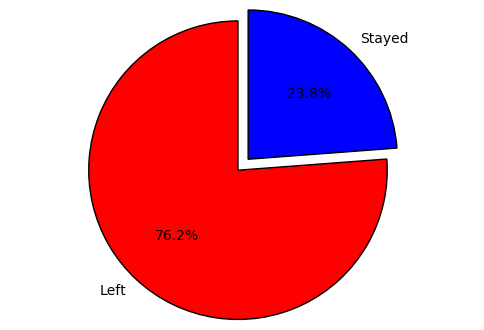

In [8]:
labels = "Left", "Stayed"
colors = ['red', 'blue']
explode = (0, 0.1)  
plt.pie(df["left"].value_counts(), explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

#### 2. Distribution of employees by salary:

low       7316
medium    6446
high      1237
Name: salary, dtype: int64


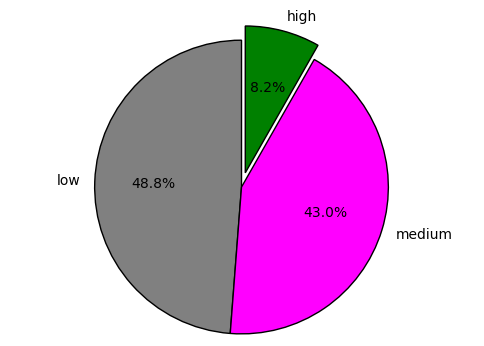

In [9]:
labels = df["salary"].unique()

print(df["salary"].value_counts())
      
colors = ['grey', 'magenta', "green"]
explode = (0, 0, 0.1)  
plt.pie(df["salary"].value_counts(), explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

#### 3. Distribution of employees by sales:

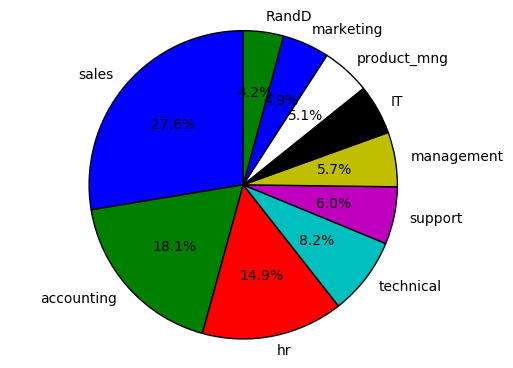

In [10]:
labels = df["sales"].unique()

plt.pie(df["sales"].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.show()

### Correlation between features: 

We need to replace our text data with numbers to see the correlation and then to feed it to the classifiers.


In [11]:
df = df.replace(['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng',
                         'marketing', 'RandD'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df = df.replace(['low', 'medium', 'high'], [1, 2, 3])

In [12]:
df["sales"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [13]:
df["salary"].unique()

array([1, 2, 3], dtype=int64)

In [14]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.015413,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.011855,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.005577,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002387,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.001611,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.019215,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.043814,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.015170,0.098119
sales,0.015413,0.011855,0.005577,-0.002387,-0.001611,0.019215,-0.043814,0.015170,1.000000,0.033415
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,0.033415,1.000000


The "left" label correlates the most with "satisfaction_level", "time_spend_company", "work_accident" and "salary".

### Scatter plots of some features:

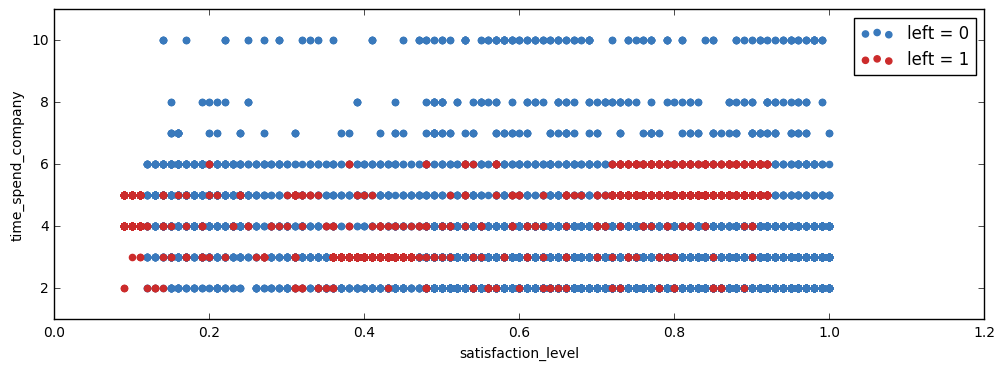

In [15]:
l_sat = df.loc[df["left"] == 1]["satisfaction_level"]
s_sat = df.loc[df["left"] == 0]["satisfaction_level"]

l_tsc = df.loc[df["left"] == 1]["time_spend_company"]
s_tsc = df.loc[df["left"] == 0]["time_spend_company"]

plt.figure(figsize=(12,4))
plt.xlabel("satisfaction_level")
plt.ylabel("time_spend_company")
scat_s = plt.scatter(s_sat, s_tsc, color='#3979BC')
scat_l = plt.scatter(l_sat, l_tsc, color="#CC2B2B")

plt.legend((scat_s, scat_l),
           ("left = 0", "left = 1"),
           loc="upper right")

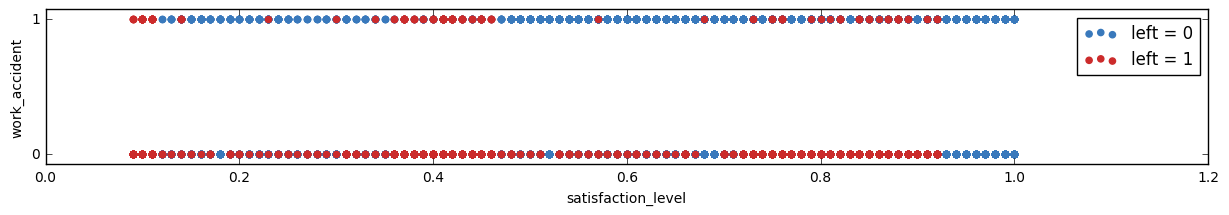

In [16]:
l_sat = df.loc[df["left"] == 1]["satisfaction_level"]
s_sat = df.loc[df["left"] == 0]["satisfaction_level"]

l_wa = df.loc[df["left"] == 1]["Work_accident"]
s_wa = df.loc[df["left"] == 0]["Work_accident"]

plt.figure(figsize=(15,2))
plt.xlabel("satisfaction_level")
plt.ylabel("work_accident")
plt.yticks([0,1])
scat_s = plt.scatter(s_sat, s_wa, color='#3979BC')
scat_l = plt.scatter(l_sat, l_wa, color="#CC2B2B")

plt.legend((scat_s, scat_l),
           ("left = 0", "left = 1"),
           loc="upper right")

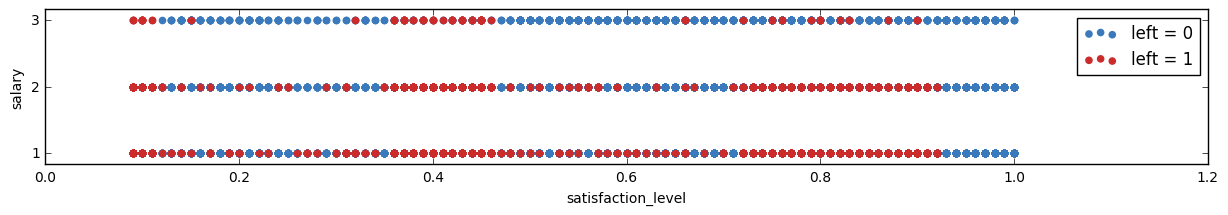

In [17]:
l_sat = df.loc[df["left"] == 1]["satisfaction_level"]
s_sat = df.loc[df["left"] == 0]["satisfaction_level"]

l_sal = df.loc[df["left"] == 1]["salary"]
s_sal = df.loc[df["left"] == 0]["salary"]

plt.figure(figsize=(15,2))
plt.xlabel("satisfaction_level")
plt.ylabel("salary")
plt.yticks([1,2,3])
scat_s = plt.scatter(s_sat, s_sal, color='#3979BC')
scat_l = plt.scatter(l_sat, l_sal, color="#CC2B2B")

plt.legend((scat_s, scat_l),
           ("left = 0", "left = 1"),
           loc="upper right")

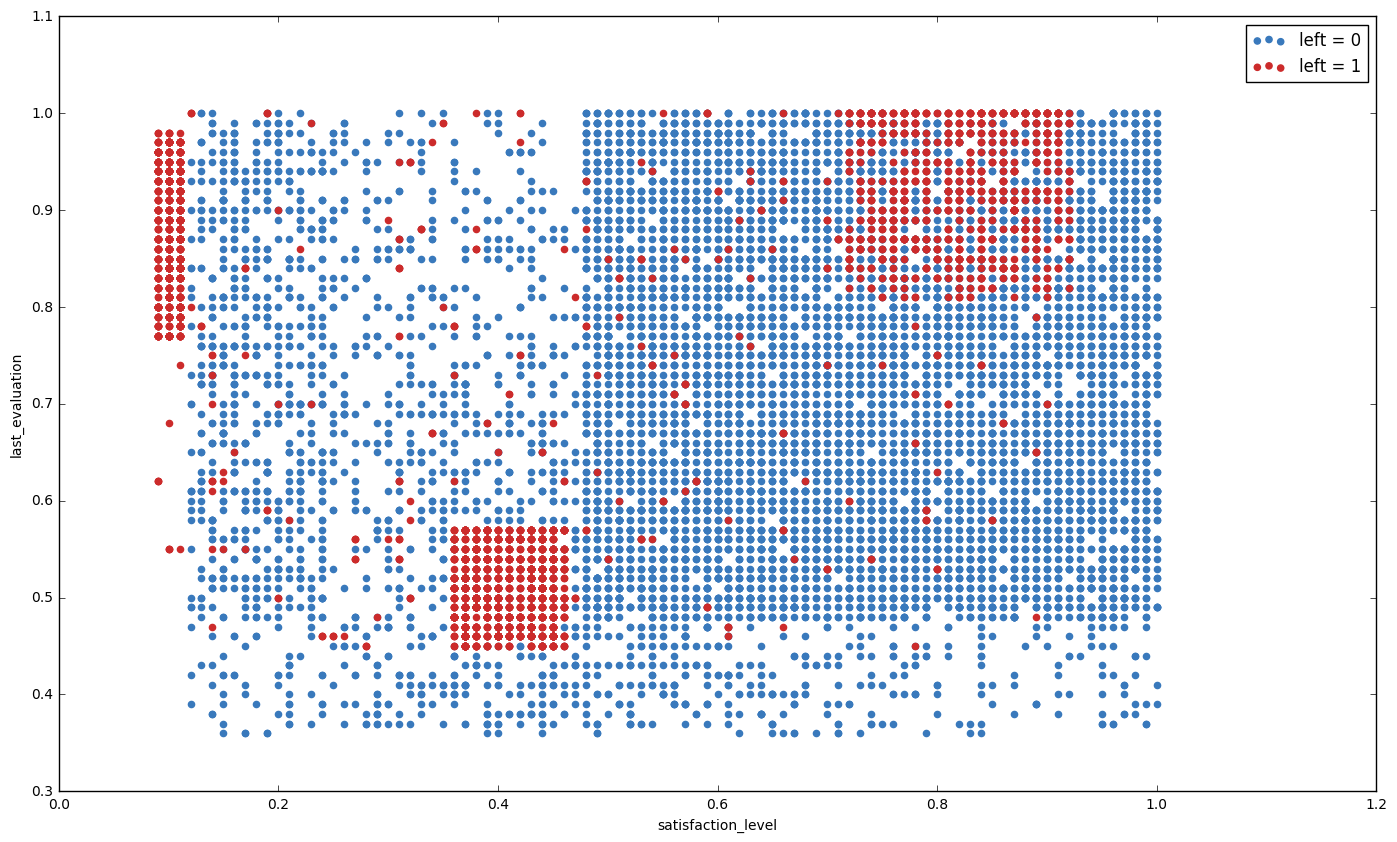

In [18]:
l_sat = df.loc[df["left"] == 1]["satisfaction_level"]
s_sat = df.loc[df["left"] == 0]["satisfaction_level"]

l_ev = df.loc[df["left"] == 1]["last_evaluation"]
s_ev = df.loc[df["left"] == 0]["last_evaluation"]

plt.figure(figsize=(17,10))
plt.xlabel("satisfaction_level")
plt.ylabel("last_evaluation")
scat_s = plt.scatter(s_sat, s_ev, color='#3979BC')
scat_l = plt.scatter(l_sat, l_ev, color="#CC2B2B")

plt.legend((scat_s, scat_l),
           ("left = 0", "left = 1"),
           loc="upper right")

We can make some conclusions if we play more with visualization, but it wont help us to see the  overall tendency.
Most of the features are discrete and there are no highly correlated features, which makes such kind of visualization not very informative. Though it's hard to classify this examples by eye, ML classifying algorithms will do their best.    

# 2. Predicting, who will leave next

Split data into train and test examples:

In [19]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.3333).copy()
print("Train length: {0}".format(train.shape[0]))

Train length: 9999


Then, separate the labels and the features:

In [20]:
train_target = train["left"]
test_target = test["left"]

In [21]:
train = train.drop('left', axis=1)
test = test.drop('left', axis=1)

In [22]:
test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
11570,0.92,0.68,4,178,3,0,0,8,1
11764,0.79,0.65,3,235,10,0,0,4,1
5685,0.79,0.95,3,222,4,0,0,4,1
13571,0.62,0.75,5,165,4,0,0,1,2
9187,0.90,0.55,4,211,3,0,0,2,2


### Predictions and accuracy:

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

gnb = GaussianNB()
gnb.fit(train, train_target)
y_gnb = gnb.predict(test)

lr = LogisticRegression()
lr.fit(train, train_target)
y_lr = lr.predict(test)

rforest = RandomForestClassifier()
rforest.fit(train, train_target)
y_rforest = rforest.predict(test)

print("Gaussian Naive Bayes.")
print("Number of mislabeled points out of a total %d points : %d"
          % (test.shape[0], (test_target != y_gnb).sum()))

print("Logistic regression.")
print("Number of mislabeled points out of a total %d points : %d"
          % (test.shape[0], (test_target != y_lr).sum()))

print("Random Forest.")
print("Number of mislabeled points out of a total %d points : %d"
          % (test.shape[0], (test_target != y_rforest).sum()))

Gaussian Naive Bayes.
Number of mislabeled points out of a total 5000 points : 984
Logistic regression.
Number of mislabeled points out of a total 5000 points : 1099
Random Forest.
Number of mislabeled points out of a total 5000 points : 59


As we see, the Random Forest makes the best predictions, because it effectively processes the data with a large number of features and handles well with both continuous and discrete features.
The other two models have much higher error but also make well.